<a href="https://colab.research.google.com/github/VoKhoiNhon/Ml2023/blob/main/Lab_5_20130355_VoKhoiNhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [2]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'
from sklearn import datasets
from sklearn import svm 
from sklearn import metrics as m
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import pandas as pd


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



y_pred:  [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
0.9532163742690059
[[ 57   6]
 [  2 106]]
(array([0.96610169, 0.94642857]), array([0.9047619 , 0.98148148]), array([0.93442623, 0.96363636]), array([ 63, 108]))
Accuracy :  0.9532163742690059
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



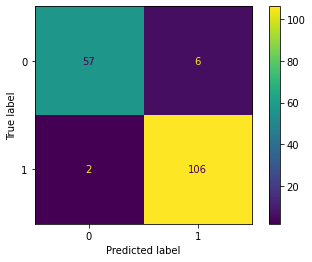

In [ ]:
# code
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test= tts(cancer['data'], cancer['target'], test_size=0.3, random_state=1)
# sc= StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print("y_pred: ",y_pred)
print(m.precision_score(y_test, y_pred, average='micro'))
print(m.consensus_score(y_test, y_pred))
print(m.recall_score(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print ("Accuracy : ",m.accuracy_score(y_test, y_pred))
print(m.classification_report(y_test, y_pred))
# print(len(y_test))

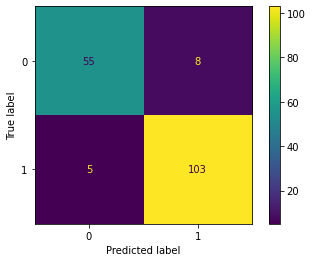

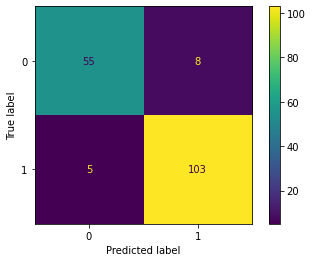

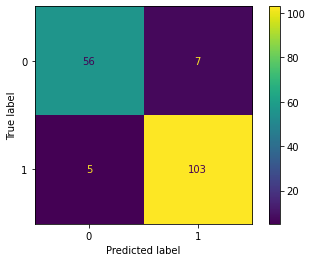

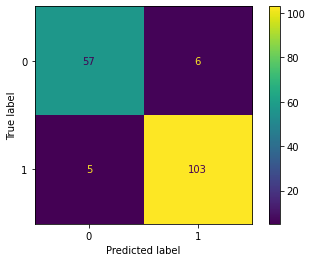

In [ ]:
acc=[]
pre=[]
recall=[]
con=[]
f1=[]
k_range=range(1,8,2)
for K in k_range:
  KNN = knc(n_neighbors=K)
  KNN.fit(X_train,y_train)
  ypred=KNN.predict(X_test)
  pre.append(m.precision_score(y_test, ypred, average='macro'))
  con.append(m.confusion_matrix (y_test, ypred))
  recall.append(m.recall_score(y_test, ypred))
  acc.append(m.accuracy_score(y_test, ypred))
  f1.append(m.f1_score(y_test, ypred))
  print(m.ConfusionMatrixDisplay.from_predictions(y_test,ypred))
# recall


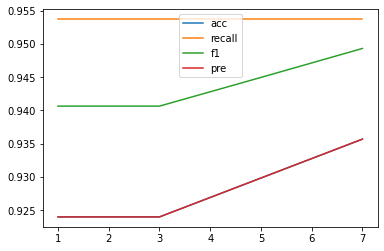

In [ ]:
plt.plot(k_range, acc, label='acc')
plt.plot(k_range, recall, label='recall')
plt.plot(k_range, f1, label= 'f1')
plt.plot(k_range, pre, label= 'pre')
plt.legend()

#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures






y_pred:  [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



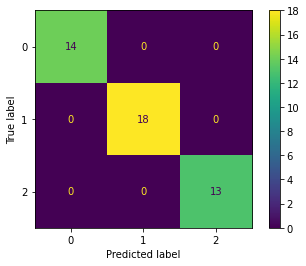

In [ ]:
# code
iris= datasets.load_iris()
Poly=['Polynomial']
Sigmoid = ['Sigmoid']
RBF = ['RBF']
Linear = ['Linear']
     
X_train, X_test, y_train, y_test= tts(iris['data'], iris['target'], test_size=0.3, random_state=1)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train) 
y_predict  = clf.predict(X_test) 
print("y_pred: ",y_pred)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

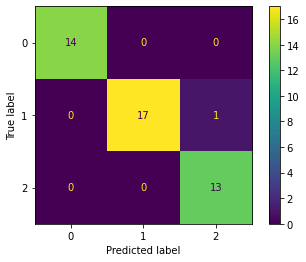

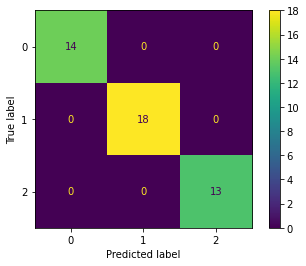

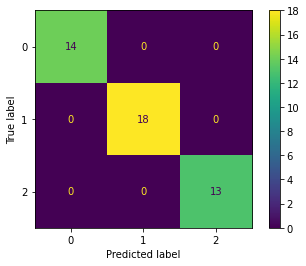

In [ ]:
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))


[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9814814814814815
F1: 0.9781305114638448
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



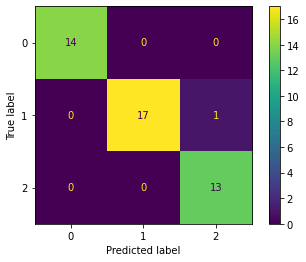

In [ ]:
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
Accuracy: 0.28888888888888886
Precision: 0.09629629629629628
Recall: 0.3333333333333333
F1: 0.14942528735632185
[[ 0  0 14]
 [ 0  0 18]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        18
           2       0.29      1.00      0.45        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

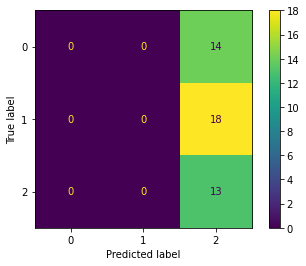

In [ ]:
clf = svm.SVC(kernel='sigmoid') 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [ ]:
t = PrettyTable(['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_rows([Linear, Poly, Sigmoid, RBF])
print(t)

+------------+----------+-----------+--------+-------+
|   Kernel   | Accuracy | Precision | Recall |   F1  |
+------------+----------+-----------+--------+-------+
|   Linear   |   1.0    |    1.0    |  1.0   |  1.0  |
| Polynomial |   1.0    |    1.0    |  1.0   |  1.0  |
|  Sigmoid   |  0.289   |   0.096   | 0.333  | 0.149 |
|    RBF     |   0.98   |    0.98   |  0.98  |  0.98 |
+------------+----------+-----------+--------+-------+


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [ ]:
mnist = datasets.load_digits()
x_train, x_test, y_train, y_test = tts(mnist['data'], mnist['target'], test_size=0.2, random_state=1)
Poly=['Polynomial']
Sigmoid = ['Sigmoid']
RBF = ['RBF']
Linear = ['Linear']

Accuracy: 0.9916666666666667
Precision: 0.9908088235294118
Recall: 0.9909078449646401
F1: 0.9907087680991878
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       

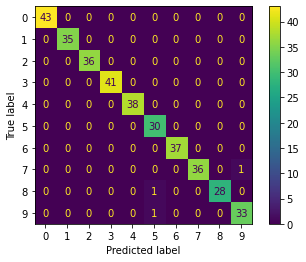

In [ ]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

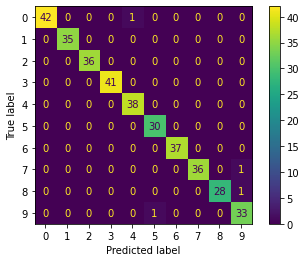

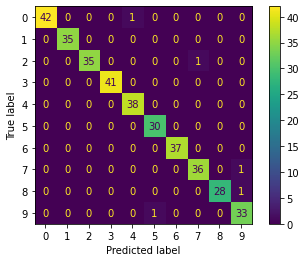

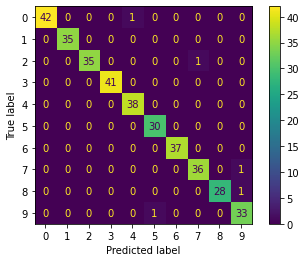

In [ ]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))


[8 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 7 6 1 3 7 5 9 8 3 2 9 8
 1 7 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 8 0 2 1 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 5 4 2 3 9 2 3 3 0 2 9 9 2 3
 2 8 1 7 9 1 2 0 1 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 8 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 9 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 1 9 1 0 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 9 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 9 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 1 9 4 7 1 3 7 8
 7 6 9 8 1 2 6 8 7 5 5 6 9 9 9 1 0 0 4 9 3 0 4 9 4 2 5]
Accuracy: 0.9111111111111111
Precision: 0.9097758458425927
Recall: 0.9077266355048661
F1: 0.9077113548578971
[[41  0  0  0  2  0  0  0  0  0]
 [ 0 29  0  0  1  0  0  3  1  1]
 [ 0  1 34  0  0  0  0  0  1  0]
 [ 0  2  0 37  0  0  0  0  2  0]
 [ 1  2  0  0 34  0  1  0  0

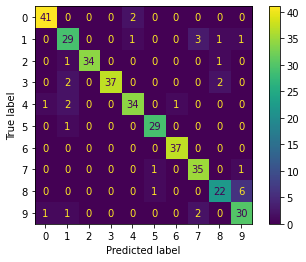

In [ ]:
clf = svm.SVC(kernel='sigmoid') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5]
Accuracy: 0.9916666666666667
Precision: 0.9910599078341015
Recall: 0.9909078449646401
F1: 0.9908885806721376
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0

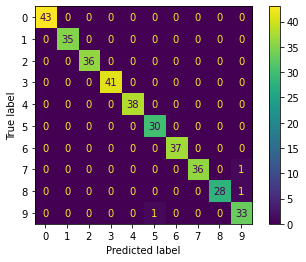

In [ ]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

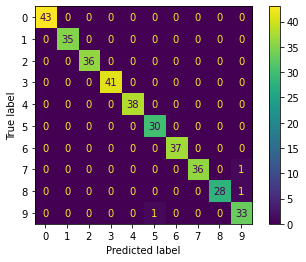

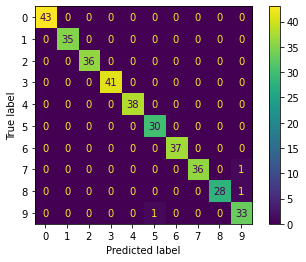

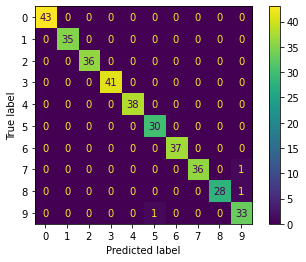

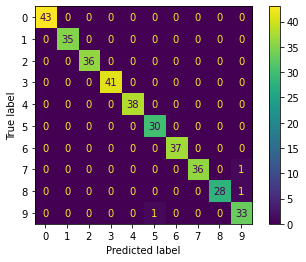

In [ ]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred, average='macro'))
  recall.append( m.recall_score(y_test, pred, average='macro'))
  f1.append(m.f1_score(y_test, pred, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9694444444444444
Precision: 0.9689970075227248
Recall: 0.9685113215471297
F1: 0.9682540010104479
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  1  1  1  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       

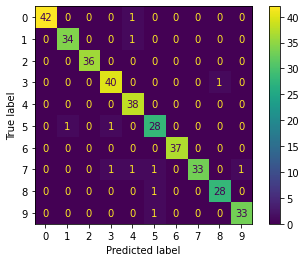

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train) 
y_predict = logistic.predict(x_test)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

Accuracy: 0.8472222222222222
Precision: 0.8461868968235067
Recall: 0.8478374037525107
F1: 0.8450689421020746
[[40  0  0  0  1  1  0  0  1  0]
 [ 0 27  2  1  2  1  0  0  1  1]
 [ 0  0 30  1  0  0  1  0  4  0]
 [ 0  0  1 32  0  0  0  2  2  4]
 [ 0  1  0  0 32  0  3  2  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  1  0  0  0 34  1  1  0]
 [ 0  1  0  1  3  0  0 31  0  1]
 [ 0  0  0  2  1  1  0  0 25  0]
 [ 0  1  0  2  1  2  0  2  1 25]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.90      0.77      0.83        35
           2       0.88      0.83      0.86        36
           3       0.82      0.78      0.80        41
           4       0.80      0.84      0.82        38
           5       0.85      0.97      0.91        30
           6       0.89      0.92      0.91        37
           7       0.82      0.84      0.83        37
           8       0.71      0.86      0.78        29
           9       

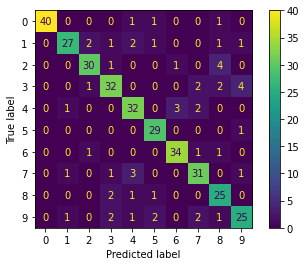

In [ ]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict, average='macro')
tree_rs = m.recall_score(y_test, y_predict, average='macro')
tree_fs = m.f1_score(y_test, y_predict, average='macro')
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [ ]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_rows([Logistic, KNN, Tree, Linear, Poly, Sigmoid, RBF])
print(t)
print(m.classification_report(y_test, y_predict))
     

+---------------------+-------+------+--------+-------+
|                     |  Acc  | Pre  | Recall |   F1  |
+---------------------+-------+------+--------+-------+
| Logistic Regression |  0.97 | 0.97 |  0.97  |  0.97 |
|         KNN         |  1.0  | 1.0  |  1.0   |  1.0  |
|         Tree        |  0.85 | 0.85 |  0.85  |  0.85 |
|        Linear       |  0.99 | 0.99 |  0.99  |  0.99 |
|      Polynomial     |  0.99 | 0.99 |  0.99  |  0.99 |
|       Sigmoid       | 0.911 | 0.91 | 0.908  | 0.908 |
|         RBF         |  0.99 | 0.99 |  0.99  |  0.99 |
+---------------------+-------+------+--------+-------+
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.90      0.77      0.83        35
           2       0.88      0.83      0.86        36
           3       0.82      0.78      0.80        41
           4       0.80      0.84      0.82        38
           5       0.85      0.97      0.91        30
     

#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [4]:
# code
data = pd.read_csv('creditcard.csv')
dataset = data.head(int(data[['Class']].count()/2))
X = dataset.drop('Class', axis=1)
y = dataset['Class']
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = tts(X_scaled, y,test_size=0.3, random_state=1)


Accuracy: 0.9991105077128344
Precision: 0.8732946232135258
Recall: 0.8921588271858909
F1: 0.8824932538855303
[[42621    21]
 [   17    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.75      0.78      0.77        79

    accuracy                           1.00     42721
   macro avg       0.87      0.89      0.88     42721
weighted avg       1.00      1.00      1.00     42721



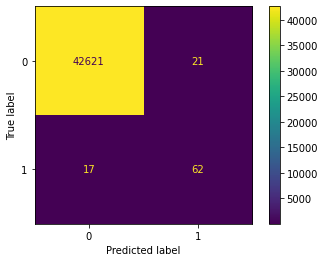

In [15]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear = ['Linear']
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

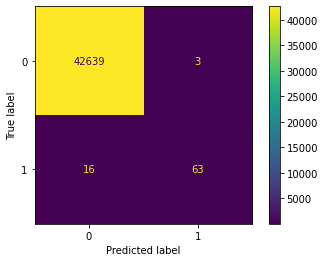

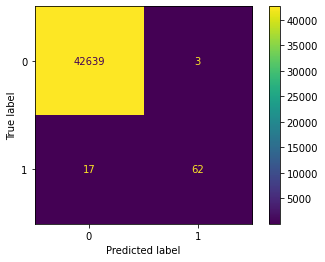

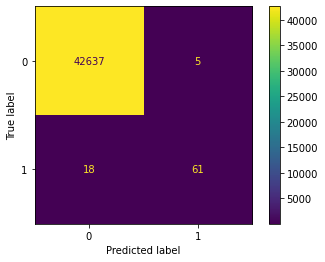

In [5]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
Poly=['Poly']
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))


[0 0 0 ... 0 0 0]
Accuracy: 0.9981273846585988
Precision: 0.7466249179097477
Recall: 0.7653185870708086
F1: 0.755628506823308
[[42599    43]
 [   37    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.49      0.53      0.51        79

    accuracy                           1.00     42721
   macro avg       0.75      0.77      0.76     42721
weighted avg       1.00      1.00      1.00     42721



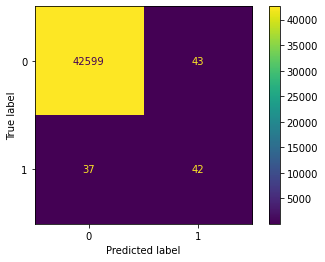

In [6]:
clf = svm.SVC(kernel='sigmoid') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid = ['Sigmoid']
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 0 0]
Accuracy: 0.9993914000140446
Precision: 0.9743067104532355
Recall: 0.8543952031603714
F1: 0.9056447053131036
[[42639     3]
 [   23    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.95      0.71      0.81        79

    accuracy                           1.00     42721
   macro avg       0.97      0.85      0.91     42721
weighted avg       1.00      1.00      1.00     42721



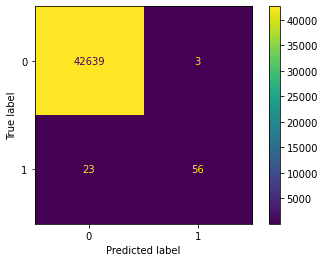

In [7]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
RBF = ['RBF']
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

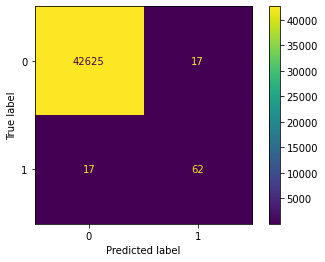

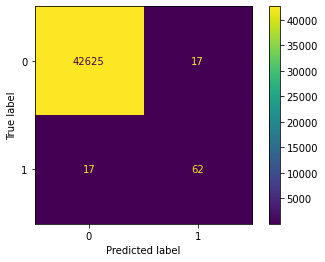

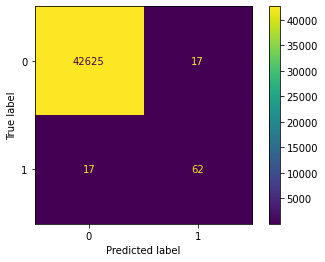

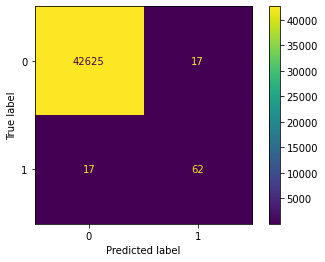

In [12]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred, average='macro'))
  recall.append( m.recall_score(y_test, pred, average='macro'))
  f1.append(m.f1_score(y_test, pred, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

Accuracy: 0.9989232461786943
Precision: 0.8805890258958851
Recall: 0.8036215854221102
F1: 0.8377585324372967
[[42627    15]
 [   31    48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.76      0.61      0.68        79

    accuracy                           1.00     42721
   macro avg       0.88      0.80      0.84     42721
weighted avg       1.00      1.00      1.00     42721



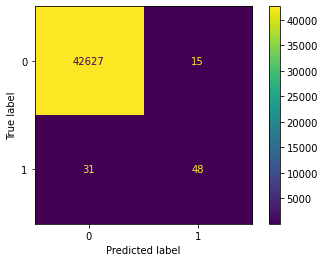

In [13]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train) 
y_predict = logistic.predict(x_test)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

Accuracy: 0.9992041384799045
Precision: 0.8922057293011763
Recall: 0.8922057293011763
F1: 0.8922057293011763
[[42625    17]
 [   17    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.78      0.78      0.78        79

    accuracy                           1.00     42721
   macro avg       0.89      0.89      0.89     42721
weighted avg       1.00      1.00      1.00     42721



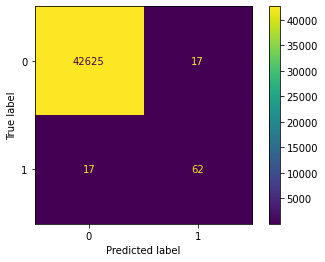

In [14]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict, average='macro')
tree_rs = m.recall_score(y_test, y_predict, average='macro')
tree_fs = m.f1_score(y_test, y_predict, average='macro')
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [16]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_rows([Logistic, KNN, Tree, Linear, Poly, Sigmoid, RBF])
print(t)
print(m.classification_report(y_test, y_predict))
     

+---------------------+-------+-------+--------+-------+
|                     |  Acc  |  Pre  | Recall |   F1  |
+---------------------+-------+-------+--------+-------+
| Logistic Regression |  1.0  |  0.88 |  0.8   |  0.84 |
|         KNN         |  1.0  |  0.93 |  0.89  |  0.91 |
|         Tree        |  1.0  |  0.89 |  0.89  |  0.89 |
|        Linear       |  1.0  |  0.87 |  0.89  |  0.88 |
|         Poly        |  1.0  |  0.98 |  0.9   |  0.93 |
|       Sigmoid       | 0.998 | 0.747 | 0.765  | 0.756 |
|         RBF         |  1.0  |  0.97 |  0.85  |  0.91 |
+---------------------+-------+-------+--------+-------+
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42642
           1       0.75      0.78      0.77        79

    accuracy                           1.00     42721
   macro avg       0.87      0.89      0.88     42721
weighted avg       1.00      1.00      1.00     42721



#Finally,
Save a copy in your Github. Remember renaming the notebook.